In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from generate_simulation import *
import vclamp_evaluator_HMMtoHH as vcl_ev
import general_plotter as plotter
from generate_simulation import *
import eval_helper as eh
import curve_fitting as cf


#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp','prst_act'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

--No graphics will be displayed.


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std        	min    	max        
1  	500   	712034 	1.17548e+06	85.957 	4.13666e+06
2  	500   	699160 	1.15296e+06	52.4873	4.13666e+06
3  	500   	154548 	545137     	38.74  	4.13661e+06
4  	500   	89853.8	415365     	38.74  	2.10889e+06
5  	500   	58971  	338763     	38.74  	2.09961e+06
6  	500   	32250.4	250186     	21.8061	2.10044e+06
7  	500   	30067.3	242083     	21.8061	2.09893e+06
8  	500   	25948.1	225835     	14.7035	2.10888e+06
9  	500   	40307.4	279973     	11.8422	2.10927e+06
10 	500   	21731.7	204603     	14.7035	2.10061e+06
11 	500   	19757.2	192468     	14.7035	2.04269e+06
12 	500   	33770.9	256747     	13.0673	2.09978e+06
13 	500   	25687.5	223804     	14.7035	2.10938e+06
14 	500   	19437.3	193870     	14.7035	2.09926e+06
15 	500   	33852.8	258624     	14.7035	2.10084e+06
16 	500   	15337.1	172805     	7.6259 	2.09912e+06
17 	500   	17840.3	184431     	7.6259 	2.10889e+06
18 	500   	30575.3	246311     	7.6259 	2.57297e+06
19 	500   	11874  	147359     	

In [6]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [7]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = eh.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} val:{opt_ps[ind]} p:{fact}')
    return p_names,p_fact
    

In [8]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [999.4476583399418, 0.18912656337109807, 1.3970825326086627, 0.022352067390043417, 289.6058731081688, 0.023533185373760153, 6.306617931244432, 0.08257784526912415, 302.0900111642504, 0.0006107489279157633, 68.61164998351198, 0.08232481484283322, 0.5273733529843418, 0.7453027627102367, 0.12636900976916474, 2.518415680356195, 4861.714633090403, 0.055346460099180525, -1.9856542840440472, -3.881296506094344, 39106.594815141645, 1.022309219647822, 5.8948767378997555]
[inact_err, act_err]: (1.347525385948771, 0.016282562277625298, 0.17456337190063193, 2.2938834967707122, 0.5923874315264123, 0.6993750000000198, 0.6230967771935485, 0.0001734821209089196)


In [9]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:0.0 ub:1000.0 val:594.1769059649223 p:0.5941769059649223
a1_1 - lb:0.0 ub:2.0 val:1.794837191394351 p:0.8974185956971755
b1_0 - lb:0.0 ub:10.0 val:5.239074882080603 p:0.5239074882080603
b1_1 - lb:0.0177 ub:0.4424 val:0.021793287578468153 p:0.009638068232795274
a2_0 - lb:0.0 ub:1000.0 val:534.2891201127072 p:0.5342891201127072
a2_1 - lb:0.0 ub:0.1 val:0.056407338176785365 p:0.5640733817678536
b2_0 - lb:0.113 ub:10.0 val:1.2818063691317074 p:0.11821648317302594
b2_1 - lb:0.0 ub:0.1 val:0.0672780732975865 p:0.672780732975865
a3_0 - lb:0.0 ub:359.0595 val:25.40959712442181 p:0.07076709326566157
a3_1 - lb:0.0 ub:0.3297 val:0.09240176119308137 p:0.2802601188749814
b3_0 - lb:0.0 ub:100.0 val:94.84086602779512 p:0.9484086602779511
b3_1 - lb:0.0 ub:0.1 val:0.061586814761728635 p:0.6158681476172864
bh_0 - lb:0.0 ub:4.0 val:1.159392398181252 p:0.289848099545313
bh_1 - lb:0.0 ub:1.445 val:0.5529496627956483 p:0.38266412650217874
bh_2 - lb:0.0139 ub:0.348 val:0.05005413593643844 p:0.10821

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

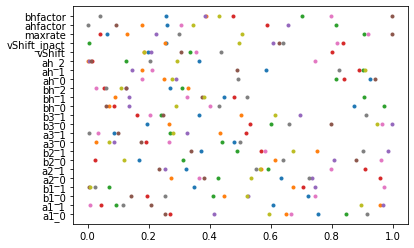

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[-1],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


In [11]:
p = best_hof

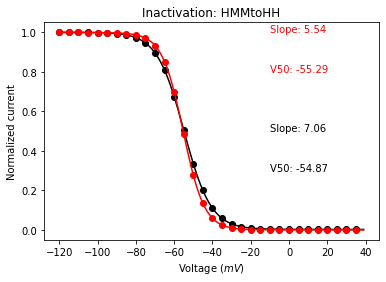

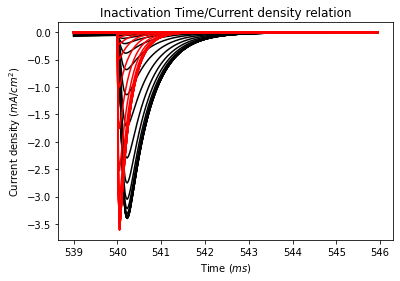

In [12]:
plotter.plot_inact(None, 'na16', False,p,'na12mut8st',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

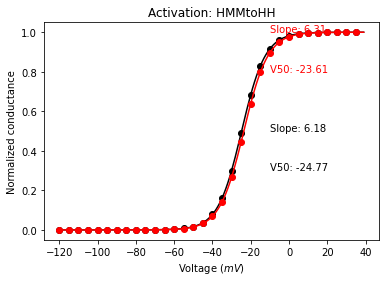

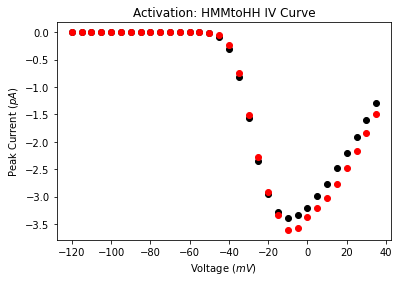

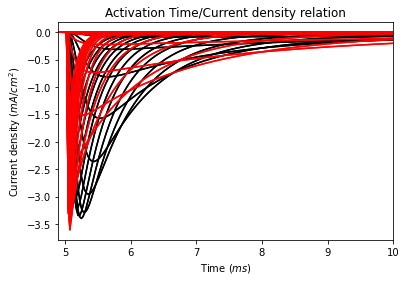

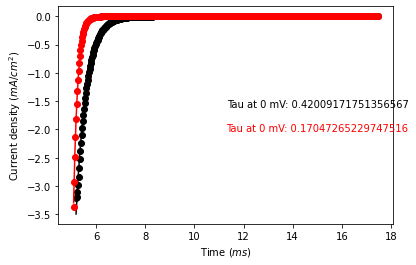

In [13]:
plotter.plot_act(None,'na16' , False,p,'na12mut8st',True,"./Plots_Folder/jinan_test.pdf", "HMMtoHH")

In [14]:
print(best_hof)

[999.4476583399418, 0.18912656337109807, 1.3970825326086627, 0.022352067390043417, 289.6058731081688, 0.023533185373760153, 6.306617931244432, 0.08257784526912415, 302.0900111642504, 0.0006107489279157633, 68.61164998351198, 0.08232481484283322, 0.5273733529843418, 0.7453027627102367, 0.12636900976916474, 2.518415680356195, 4861.714633090403, 0.055346460099180525, -1.9856542840440472, -3.881296506094344, 39106.594815141645, 1.022309219647822, 5.8948767378997555]


# Test HH Target data

In [16]:
wild_data = {}
# Getting objective base values for HH model.
is_HMM = False 
# Create genSim objects

act_obj = Activation_general(channel_name='na16')
tau0 = act_obj.get_Tau_0mV()
act_obj = Activation_general(channel_name='na16')
act_obj.genActivation()
peak_amp = act_obj.find_peak_amp([14, 33])
time_to_peak = act_obj.find_time_to_peak([14, 33])
prst_act = cf.calc_act_prst_curr(act_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
inact_obj = Inactivation_general(channel_name='na16')
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
wild_data['tau0'] = tau0
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
wild_data['prst_act'] = prst_act
print(wild_data)



{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039], 'prst_act': -0.002081691514596226}


In [17]:
sf = evaluator.score_calculator
print(evaluator.wild_data)

{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039], 'prst_act': -0.002081691514596226}


# Test Scoring

In [18]:
errors = evaluator.evaluate_with_lists(best_hof)
print(errors)
print(sum(errors))

(1.347525385948771, 0.016282562277625298, 0.17456337190063193, 2.2938834967707122, 0.5923874315264123, 0.6993750000000198, 0.6230967771935485, 0.0001734821209089196)
5.74728750773863


In [19]:


objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp','prst_act']
act_obj = Activation_general(channel_name='na12mut8st')
inact_obj = Inactivation_general(channel_name='na12mut8st')
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [20]:
sf.dv_half_act_diff
sf.gv_slope_diff

'100'

In [27]:
objectives=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp','prst_act']
try:
    gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
    ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
    # y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
    #print('gv_slope: ' + str(gv_slope))
    #print('v_half_act: ' + str(v_half_act))
    #print('ssi_slope: ' + str(ssi_slope))
    #print('v_half_inact: ' + str(v_half_inact))

except ZeroDivisionError:
    print('Zero Division Error************')
    error_val = []
    for i in range(len(objectives)):
        error_val.append(1000)


time_to_peak = act_obj.find_time_to_peak([14, 33])
peak_amp = act_obj.find_peak_amp([14, 33])
tau0 = act_obj.get_Tau_0mV()
prst_act = cf.calc_act_prst_curr(act_obj)
errors = []
if 'v_half_act' in objectives:
    vhalf_act_error = sf.dv_half_act(sf.dv_half_act_diff, v_half_act)
    errors.append(vhalf_act_error)
if 'gv_slope' in objectives:
    gv_slope_error = sf.gv_slope(sf.gv_slope_diff, gv_slope)
    errors.append(gv_slope_error)
if 'v_half_ssi' in objectives:
    v_half_ssi_error = sf.dv_half_ssi(sf.dv_half_ssi_diff, v_half_inact)
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objectives:
    ssi_slope_error = sf.ssi_slope(sf.ssi_slope_diff, ssi_slope)
    errors.append(ssi_slope_error)
if 'peak_current' in objectives:
    peak_amp_errors = sf.calc_peak_amp_err(act_obj)
    errors.append(peak_amp_errors)
if 'ttp' in objectives:
    time_to_peak_error = sf.calc_ttp_err(act_obj)
    errors.append(time_to_peak_error)
if 'tau0' in objectives:
    tau0_error = sf.calc_tau0_err(act_obj)*10
    errors.append(tau0_error)
if 'prst_act' in objectives:
    prst_act_error = sf.calc_prst_act(act_obj)*1000000
    errors.append(prst_act_error)

In [28]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is:\n {peak_amp} WT:\n{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is:\n {time_to_peak} WT:\n{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")
print(f" prst_act is: {prst_act} WT:{wild_data['prst_act']} error: {errors[7]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp', 'prst_act']
 vhalf_act is: -23.605944338590735 WT:-24.766773949665836 error: 1.347525385948771
 gv_slope is: 6.3104925416017545 WT:6.182889397919378 error: 0.016282562277625298
 v_half_ssi is: -55.29067847158683 WT:-54.87287065464149 error: 0.17456337190063193
 ssi_slope is: 5.544213057846299 WT:7.058770252794946 error: 2.2938834967707122
 peak_current is:
 [-0.007995300873944658, -0.04625350605534408, -0.2245291921409317, -0.7362430491588504, -1.5133981698356904, -2.285940306364698, -2.923951722760972, -3.3425064642023767, -3.608900654635791, -3.572749471084754, -3.377748533326628, -3.2129747686851444, -3.0240354527138247, -2.774880689152712, -2.4866459258413713, -2.171216495556766, -1.836374996509089, -1.4876840780528735, -3.377748533326628] WT:
[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612

In [ ]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


In [ ]:
print(act_obj.ipeak_vec)

In [ ]:
cf.calc_act_obj(act_obj)

In [ ]:
print(act_obj.ipeak_vec[12])

In [ ]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

In [ ]:
print(act_obj.t_vec[np.argmin(i12)])

In [ ]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

In [ ]:
print(best_hof)

In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
time_to_peak = act_obj.find_time_to_peak([14,33])
time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])

In [ ]:
print(time_to_peak)

In [ ]:
print(evaluator.wild_data['time_to_peak'])


In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
act_obj.clamp(0)

In [ ]:
act_obj.find_ipeaks()

In [ ]:
from generate_simulation import *
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
import general_plotter as plotter

In [ ]:
plotter.plot_currents_general(act_obj,time_range = [5,25],v_range = [0,5],i_range = [-0.3,0])


In [ ]:
print(act_obj.all_is[0])

In [ ]:
v_mask = list(np.where(np.logical_and(act_obj.v_vec >= -10, act_obj.v_vec <=10))[0])

In [ ]:
print(v_mask)

In [ ]:
zero_ind = np.where(act_obj.v_vec == 0)[0][0]

In [ ]:
print(zero_ind)